04-1 로지스틱 회귀

prob)
럭키백 속의 생선이 어떤 타깃에 속하는지에 대한 확률 구하기


럭키백의 확률)
생선의 길이, 높이, 두께, 대각선 길이, 무게 데이터를 이용하여 7개 생선에 대한 확률 출력

k-최근접 이웃 알고리즘 활용!

이웃 클래스의 비율을 확률로 출력

In [1]:
#데이터 준비

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

#데이터셋의 처음 5개 행 출력
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
#어떤 종류의 생선이 있는지 확인

print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
#불러온 전체 데이터셋에서 첫번째 열(생선 종류) -> 타깃 데이터로 만들기
#불러온 전체 데이터셋에서 첫번째 열을 제외한 모든 열(생선 특성) -> 입력 데이터로 만들기

#5개의 열 넘파이 배열로 바꾸기
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

#5개의 특성을 저장한 처음 5개 행 출력
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
#타깃 데이터 만들기

fish_target = fish['Species'].to_numpy()

In [5]:
#훈련, 테스트 세트 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [6]:
#훈련, 테스트 세트 표준화 전처리

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
#k-최근접 이웃 분류기의 확률 예측

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


7개의 생선 - 타깃이 7개

다중분류)
타깃 데이터에 2개 이상의 클래스가 포함된 문제

사이킷런에서는 문자열로 된 타깃값을 그대로 사용 가능
이때, 타깃값을 그대로 모델에 전달하면 자동으로 순서가 알파벳 순으로 매겨짐
-> pd.unique()로 출력했던 순서와 다름

In [8]:
#정렬된 타깃값 출력

print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [9]:
#테스트 세트에 있는 처음 5개의 샘플의 타깃값 예측

print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [10]:
#클래스별 확률값 확인

import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


각 생선들에 대한 예측 확률을 확인할 수 있음

이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인하기
-> 4번째 샘플(4번째 행)의 최근접 이웃(3개)의 클래스 확인하기

In [11]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


3번째 클래스 Perch 2개, 5번째 클래스 Roach 1개
-> 이에 맞는 예측 확률 출력됨

그런데 k=3인 이상, 출력 가능한 확률은 1/3, 2/3, 3/3 뿐임
-> 이를 확률이라고 부르기에는 애매함

로지스틱 회귀)

이름은 회귀이지만, 분류 모델로서 사용됨

선형회귀와 동일하게 선형 방정식을 학습

z = a*(weight) + b*(length) ... + f

a,b,c,d,e,f <- 가중치, 계수를 학습

z값은 어떤 값이나 될 수 있기 때문에 이를 확률로 변환해주어야함


시그모이드 함수(로지스틱 함수)를 통해 구현)

z를 0~1 사이의 확률로 변환해주는 함수

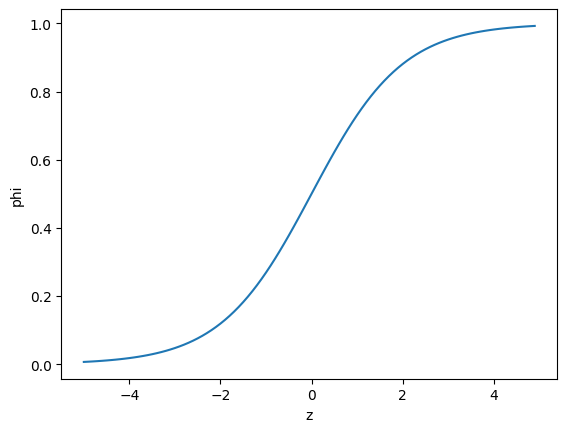

In [13]:
#시그모이드 함수 출력

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

z의 값에 따라 0~1 사이의 확률로 출력해주는 시그모이드 함수

임계점을 0.5로 설정하여 임계점을 넘으면 클래스 1로, 넘지 못하면 클래스 0으로 판단하여 이진분류 수행

In [14]:
#로지스틱 회귀로 이진분류 수행하기
#불리언 인덱싱 사용
#(true, false 값을 전달하여 행을 지정)

#bream, smelt인 것만 true 나머지는 false로 설정된 열을 생성
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

#처음 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [16]:
#두 클래스에 대한 확률 출력

print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [17]:
#타깃값이 알파벳 순으로 정렬되어 있으므로 인덱스0이 Bream에 대한 확률, 인덱스1이 Smelt에 대한 확률

print(lr.classes_)

['Bream' 'Smelt']


두번째 샘플 제외, 모두 Bream 클래스로 예측

로지스틱 회귀로 이진분류 수행

In [18]:
#로지스틱 회귀 모델이 학습한 가중치 확인

print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [19]:
#처음 5개 샘플의 z값 출력

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [20]:
#z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음

from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


predict_proba() 메서드 출력의 두번째 열의 값과 동일한 것을 확인할 수 있음

-> decision_function() 메서드는 양성 클래스에 대한 z값을 반환

-> 음성 클래스에 대한 z값은 1에서 양성 클래스의 z값을 빼면 됨


이제 7개의 생선을 분류하는 다중 분류 문제 해결

In [21]:
#로디스틱 회귀로 다중분류 수행하기

#로지스틱 회귀는 반복적인 알고리즘 사용 (max_iter=1000 으로 설정하여 반복횟수 부족하지 않도록 하기)
#로지스틱 회귀는 기본적으로 계수의 제곱을 규제함(L2 규제)
#C 매개변수로 로지스틱 회귀의 규제 제어
#릿지 회귀의 alpha 매개변수와 반대로 C의 값이 커지면 규제가 작아지고, C의 값이 작아지면 규제가 커짐

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [22]:
#처음 5개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [23]:
#예측에 대한 확률 출력
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


5개 샘플에 대한 예측 확률이므로, 5개의 행이 출력됨

7개의 생선에 대한 예측이므로, 7개의 열이 출력됨(각 열은 샘플이 해당 생선일 확률)

가장 높은 확률이 예측 클래스가 됨

In [25]:
#예측된 생선과, 예측 확률이 일치하는지 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [26]:
#다중분류의 선형 방정식 형태 확인

print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


5개의 특성을 사용하였으므로, coef_ 배열의 열은 5개

행이 7개인 이유?)
다중분류는 클래스마다 z값을 하나씩 계산하므로, 행이 7개임

가장 높은 z값을 출력하는 클래스가 예측 클래스가 됨

다중분류에서는 '소프트맥스'함수를 이용하여 z값을 0~1 사이의 확률로 변환

In [27]:
#z1~z7 까지의 값을 구한 다음, 소프트맥스 함수를 사용해 확률로 변환

#각 클래스에 대한 z값 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [28]:
#소프트맥스 함수로 z값을 확률로 변환하기
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


axis로 소프트맥스를 계산할 축 지정
(axis=1로 지정하여 각 행, 즉 샘플에 대해 연산 수행)

앞서 구한 proba와 정확히 일치하는 것을 확인할 수 있음

04-2 확률적 경사 하강법

prob)
생선 데이터가 한번에 들어오는 것이 아닌, 조금씩 전달됨

점진적 학습)

앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해 조금씩 더 훈련하는 학습 방법
ex - 확률적 경사 하강법


확률적 경사 하강법)
가장 가파른 경사를 따라 내려가서 빠르게 원하는 지점에 도달하는 것이 목표
-> 조금씩 내려와야 원하는 지점에 도달 가능

이렇게 내려오는 과정이 경사 하강법 모델을 훈련하는 것

가장 가파른 경사를 찾기 위해 확률적으로 랜덤하게 길을 골라 찾는 것
-> 훈련세트에서 랜덤하게 하나의 샘플을 고르는 것 : 확률적 경사 하강법

미니배치 경사 하강법 : 여러개의 샘플을 사용해 경사 하강법을 수행하는 방식
배치 경사 하강법 : 극단적으로 전체 샘플을 사용해 경사 하강법 수행

에포크 : 훈련세트를 한번 모두 사용하는 과정
-> 일반적으로 경사하강법은 이 에포크를 여러번 수행


'훈련세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘'
'손실 함수J(θ) 의 기울기(gradient)를 계산하고, 이를 반대 방향으로 일정한 크기(학습률 𝛼)만큼 이동하면서 최적의 𝜃 값을 찾아가는 방식'

손실함수)

머신러닝 알고리즘의 성능을 측정하는 기준

손실함수가 작을 수록 좋음


로지스틱 손실함수)

예측*타깃 을 음수로 바꾸어 사용
-> 이 값이 '손실'이 됨

음성클래스(0)을 곱하면 무조건 0이 되므로, 양성클래스(1)에 대한 예측으로 바꾸어 계산한 후, 1에서 이 값을 빼줌, 그리고 마찬가지로 음수화

'음수화'하므로, 절대값이 클수록 손실이 작은 것(좋음)


로그함수로 변환하여 이해하기 쉽도록 바꾸기)

타깃 = 1일때 : -log(예측확률)
-> 예측 확률이 1에서 멀어질수록 손실값이 커짐


타깃 = 0일때 : -log(1-예측확률)
-> 예측 확률이 0에서 멀어질수록 손실값이 커짐


이러한 손실함수 : 로지스틱 손실함수 or 이진 크로스엔트로피 손실함수

다중분류에서 사용하는 손실함수 : 크로스엔트로피 손실함수





In [34]:
#SGD Classifier - 경사하강법을 사용한 분류 모델


#데이터 불러오기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

#입력, 타깃 데이터 각각 넘파이 배열로 바꾸기
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

#훈련, 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

#표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [35]:
#확률적 경사하강법 제공하는 분류 클래스 import

from sklearn.linear_model import SGDClassifier

In [37]:
#손실함수를 log함수로 지정, 반복횟수를 10회로 지정
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

#모델 훈련
sc.fit(train_scaled, train_target)

#정확도 점수 출력
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


훈련, 테스트 세트 점수가 매우 낮은 것을 보니 반복 횟수가 충분치 못한 것(max_iter=10)

반복 횟수 부족으로 ConvergenceWarning이 뜸

In [38]:
#SGDClassifier 객체를 다시 만들지 않고, 훈련한 모델 sc를 추가로 더 훈련(partial_fit 메서드 사용)
#호출할 때 마다 1에포크 씩 이어서 훈련 가능

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


에포크를 한번 더 실행하였더니, 정확도가 향상됨

-> 여러 에포크에서 더 훈련해 봐야할듯

-> 계속 반복할 수 없으니 기준이 필요

에포크와 과대/과소적합

확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소,과대적합 될 수 있음

과소적합 : 에포크 횟수가 적어 모델이 훈련세트를 덜 학습(산을 다 내려오기 전, 훈련을 마친 셈)

과대적합 : 에포크 횟수가 너무 많아 모델이 훈련세트를 완전히 학습(훈련세트에만 맞는 모델이 만들어짐)

'에포크가 진행됨에 따라 모델의 정확도를 나타낸 그래프'(p.210)

테스트세트 점수가 어느 순간 감소하기 시작하는 부분 : 모델이 과대적합 되기 시작함

-> 과대적합이 시작하기 전에 훈련을 멈추는 것 : 조기종료

In [39]:
#partial_fit 메서드만 사용


import numpy as np
sc = SGDClassifier(loss = 'log_loss', random_state=42)

#에포크마다 훈련 세트와 테스트 세트에 대한 점수 기록을 위한 2개의 리스트 준비
train_score = []
test_score = []


#7개 생선의 목록 만들기
classes = np.unique(train_target)

In [41]:
#300번의 에포크 동안 훈련을 반복
#훈련, 테스트 세트의 점수를 계산하여 각 리스트에 추가

for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

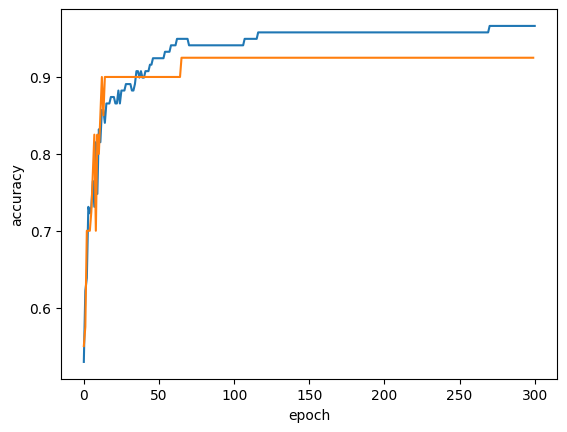

In [42]:
#300번의 에포크 동안 기록한 훈련, 테스트 세트의 점수 그래프화

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

파랑 : 훈련세트
주황 : 테스트세트

백번째 에포크 이후로 훈련, 테스트 세트의 점수가 조금씩 벌어짐

에포크 초기 : 과소적합으로 두 점수가 모두 낮음

-> 백번째 에포크에서 두 점수가 가장 가깝게 위치, 적절한 에포크 수로 판단

In [43]:
#에포크 100회로 지정하여 모델 다시 훈련

sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier은 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤

tol 매개변수로 향상될 최솟값을 지정(최소 tol만큼 성능이 향상되지 않으면 훈련을 멈춤)

위 예제에서는 tol=None으로 지정하여 자동으로 훈련을 멈추지 않고 무조건 100회의 반복으로 훈련하도록 함

-> 최정 점수가 만족스러움 !



In [44]:
#SGDClassifier의 loss 매개변수
#loss 매개변수의 기본값 = hinge
#힌지 손실은 '서포트 벡터 머신'이라는 머신러닝 알고리즘을 위한 손실 함수
#SGDClassifier은 여러 종류의 손실함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
